In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


In [8]:
dataframe = pd.read_csv(r"C:\Users\dindi\Downloads\data\Swiggydata.csv") 
print("Initial Preview:")
print(dataframe.head())

Initial Preview:
                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [9]:
def handleRate(value):
    value = str(value).split('/')[0].strip()
    try:
        return float(value)
    except:
        return np.nan

dataframe['rate'] = dataframe['rate'].apply(handleRate)
dataframe.dropna(subset=['rate'], inplace=True)  # Remove rows where rate is NaN


dataframe['approx_cost(for two people)'] = dataframe['approx_cost(for two people)'].astype(str).str.replace(',', '')
dataframe['approx_cost(for two people)'] = pd.to_numeric(dataframe['approx_cost(for two people)'], errors='coerce')
dataframe.dropna(subset=['approx_cost(for two people)'], inplace=True)


print("\nData Summary:")
dataframe.info()


Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


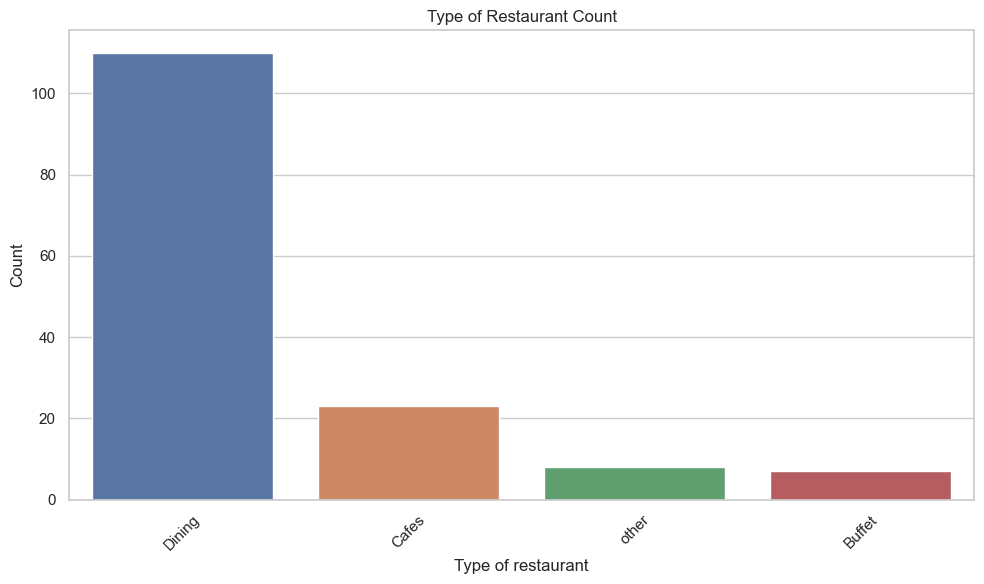

In [11]:
sns.countplot(data=dataframe, x='listed_in(type)', order=dataframe['listed_in(type)'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Type of Restaurant Count')
plt.xlabel("Type of restaurant")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

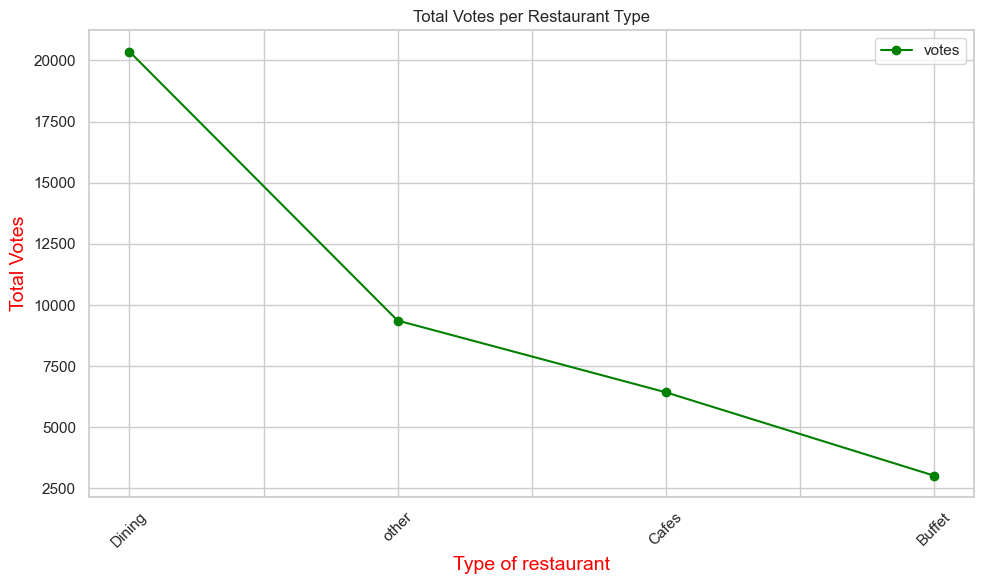

In [12]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum().sort_values(ascending=False)
result = pd.DataFrame({'votes': grouped_data})
result.plot(kind='line', marker='o', color='green')
plt.title('Total Votes per Restaurant Type')
plt.xlabel('Type of restaurant', c='red', size=14)
plt.ylabel('Total Votes', c='red', size=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
max_votes = dataframe['votes'].max()
top_voted_restaurant = dataframe.loc[dataframe['votes'] == max_votes, 'name']
print('\n🏆 Restaurant(s) with the maximum votes:')
print(top_voted_restaurant.values)


🏆 Restaurant(s) with the maximum votes:
['Empire Restaurant']


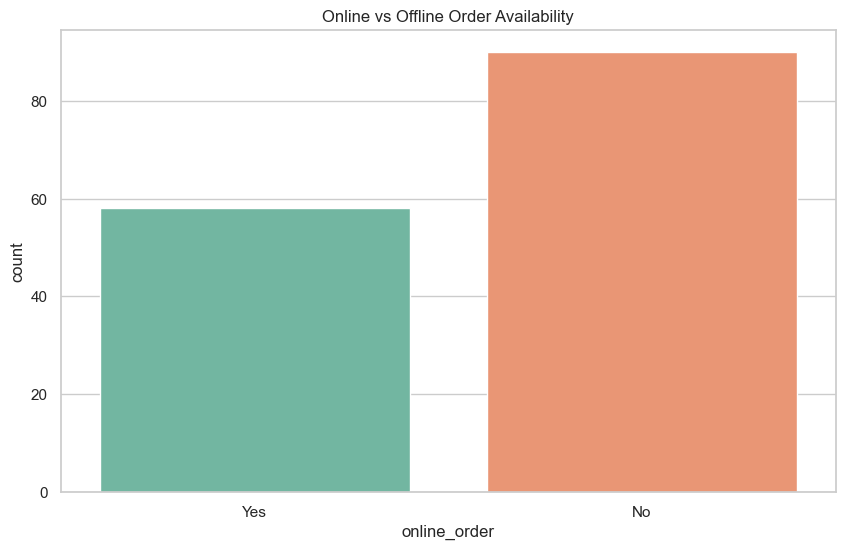

In [14]:
sns.countplot(data=dataframe, x='online_order', palette='Set2')
plt.title('Online vs Offline Order Availability')
plt.show()

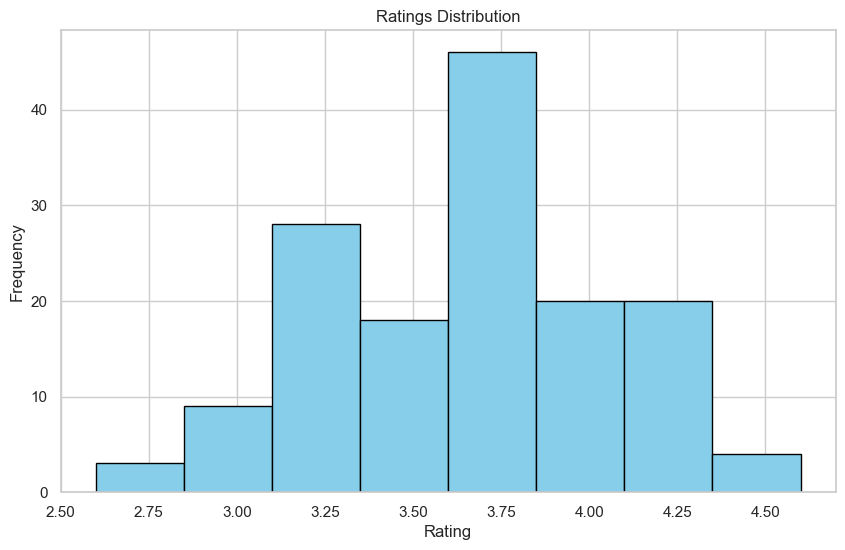

In [15]:
plt.hist(dataframe['rate'], bins=8, color='skyblue', edgecolor='black')
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

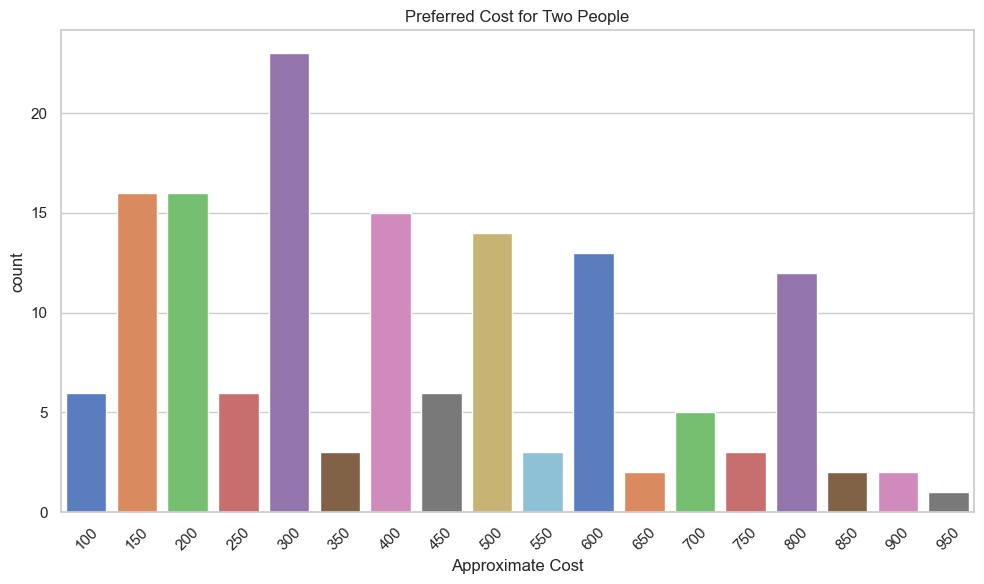

In [16]:
sns.countplot(x=dataframe['approx_cost(for two people)'], palette='muted')
plt.title('Preferred Cost for Two People')
plt.xlabel('Approximate Cost')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

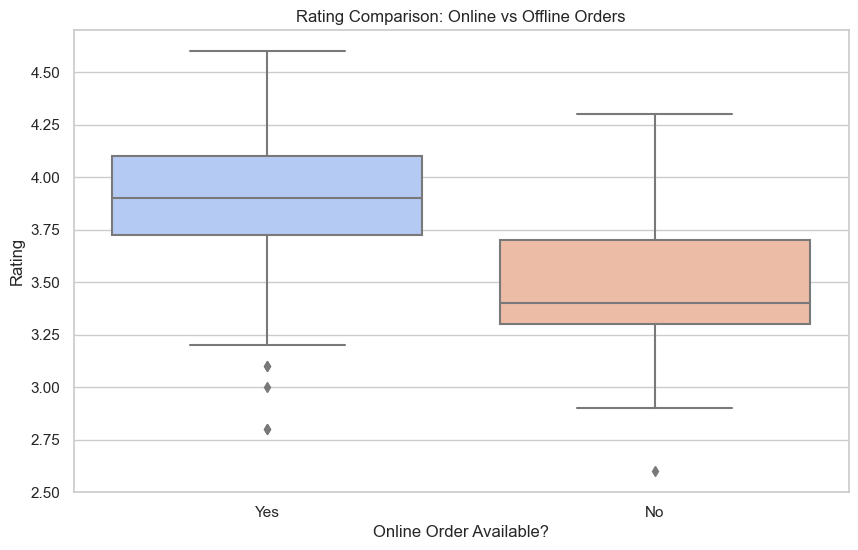

In [17]:
sns.boxplot(x='online_order', y='rate', data=dataframe, palette='coolwarm')
plt.title('Rating Comparison: Online vs Offline Orders')
plt.xlabel('Online Order Available?')
plt.ylabel('Rating')
plt.show()


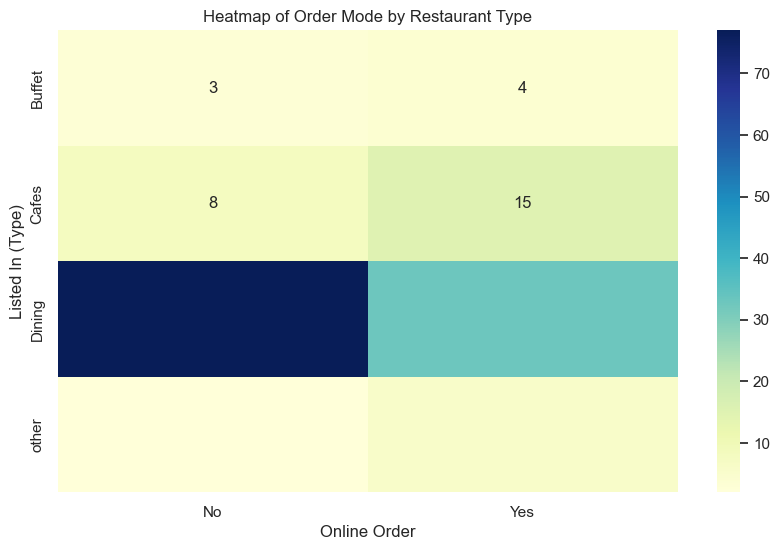

In [18]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap of Order Mode by Restaurant Type')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()

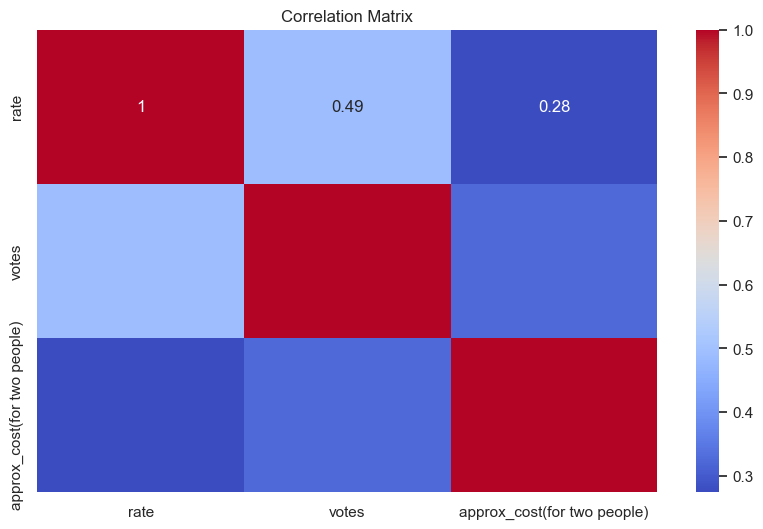

In [19]:
corr_matrix = dataframe[['rate', 'votes', 'approx_cost(for two people)']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [20]:
print("\n💡 Top Rated Budget-Friendly Restaurants (Rating >= 4.0 & Cost <= 500):")
budget = dataframe[(dataframe['rate'] >= 4.0) & (dataframe['approx_cost(for two people)'] <= 500)]
print(budget[['name', 'rate', 'approx_cost(for two people)']].sort_values(by='rate', ascending=False).head(10))


💡 Top Rated Budget-Friendly Restaurants (Rating >= 4.0 & Cost <= 500):
                                            name  rate  \
52                        Corner House Ice Cream   4.3   
34                                        Faasos   4.2   
81                                 Frozen Bottle   4.2   
12                              The Coffee Shack   4.2   
10                                  Village Café   4.1   
71                              The Biryani Cafe   4.1   
133                            Swathi Cool Point   4.1   
120                       Bengaluru Coffee House   4.1   
76   Sri Guru Kottureshwara Davangere Benne Dosa   4.1   
72                                 Spicy Tandoor   4.1   

     approx_cost(for two people)  
52                           400  
34                           500  
81                           400  
12                           500  
10                           500  
71                           300  
133                          200  
120      

In [ ]:
swiggy_df = pd.read_csv(r"C:\Users\dindi\Downloads\data\Swiggydata.csv")

swiggy_df['rate'] = swiggy_df['rate'].astype(str).str.split('/').str[0].str.strip()
swiggy_df['rate'] = pd.to_numeric(swiggy_df['rate'], errors='coerce')

swiggy_df['approx_cost(for two people)'] = swiggy_df['approx_cost(for two people)'].astype(str).str.replace(',', '')
swiggy_df['approx_cost(for two people)'] = pd.to_numeric(swiggy_df['approx_cost(for two people)'], errors='coerce')

swiggy_df.dropna(subset=['rate', 'approx_cost(for two people)'], inplace=True)

fig1 = px.histogram(swiggy_df, x='listed_in(type)', title='Type of Restaurant Count')
fig1.show()

grouped_votes = swiggy_df.groupby('listed_in(type)')['votes'].sum().reset_index()
fig2 = px.line(grouped_votes, x='listed_in(type)', y='votes', markers=True, title='Total Votes per Restaurant Type')
fig2.show()

fig3 = px.histogram(swiggy_df, x='online_order', title='Online vs Offline Order Availability')
fig3.show()

fig4 = px.histogram(swiggy_df, x='rate', nbins=8, title='Ratings Distribution')
fig4.show()

fig5 = px.histogram(swiggy_df, x='approx_cost(for two people)', title='Preferred Cost for Two People')
fig5.show()

fig6 = px.box(swiggy_df, x='online_order', y='rate', title='Boxplot of Ratings by Online Order Availability')
fig6.show()

pivot_table = swiggy_df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
heatmap_fig = go.Figure(data=go.Heatmap(z=pivot_table.values, x=pivot_table.columns.tolist(), y=pivot_table.index.tolist(), colorscale='YlGnBu'))
heatmap_fig.update_layout(title='Heatmap of Online Orders by Restaurant Type')
heatmap_fig.show()
